Axial Stress: 10000000.00 Pa
Axial Strain: 0.000500
Torsional Shear Stress: 40743665.43 Pa
Bending Stress: 192000000.00 Pa
Deflection at mid-span: 0.030476 m


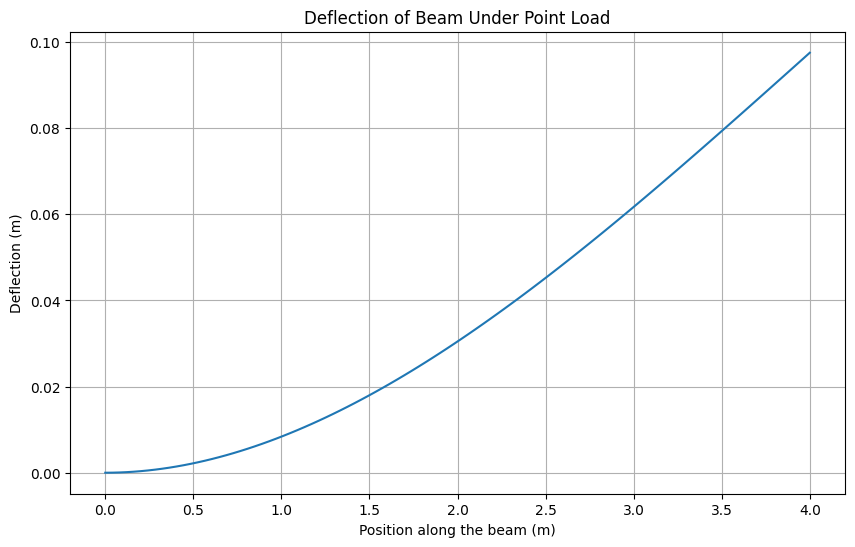

In [1]:
%matplotlib inline
from math import pi
import matplotlib.pyplot as plt
import numpy as np

# Import all the functions and Material class from your module
from Mechanics_of_Materials_Functions import (
    axial_stress, axial_strain, torsional_shear_stress, polar_moment_of_inertia, 
    bending_stress, moment_of_inertia_rectangle, beam_deflection_point_load, 
    shear_stress, stress_transformation_2D, strain_energy, combined_stress, 
    critical_load, youngs_modulus, Material, materials
)

def solve_rod_tension():
    # Problem: Calculate axial stress and strain in a steel rod under tension
    force = 5000  # N
    area = 0.0005  # m^2
    original_length = 2  # m
    delta_length = 0.001  # m
    
    stress = axial_stress(force, area)
    strain = axial_strain(delta_length, original_length)
    
    print(f"Axial Stress: {stress:.2f} Pa")
    print(f"Axial Strain: {strain:.6f}")

def solve_shaft_torque():
    # Problem: Determine the torsional shear stress in a circular shaft
    torque = 1000  # Nm
    diameter = 0.05  # m
    
    polar_moment = polar_moment_of_inertia(diameter)
    shear_stress = torsional_shear_stress(torque, diameter/2, polar_moment)
    
    print(f"Torsional Shear Stress: {shear_stress:.2f} Pa")

def solve_beam_bending():
    # Problem: Calculate bending stress in a rectangular beam
    moment = 10000  # Nm
    distance = 0.02  # m from neutral axis
    width, height = 0.1, 0.05  # m
    
    inertia = moment_of_inertia_rectangle(width, height)
    stress = bending_stress(moment, distance, inertia)
    
    print(f"Bending Stress: {stress:.2f} Pa")

def solve_beam_deflection():
    # Problem: Find deflection at midspan of a simply supported beam
    load = 1000  # N
    length = 4  # m
    material = materials["steel"]  # Using steel properties
    inertia = moment_of_inertia_rectangle(0.1, 0.05)  # For a 10cm x 5cm beam
    
    # Generate deflection curve
    positions = np.linspace(0, length, 100)
    deflections = [beam_deflection_point_load(load, length, material.E, inertia, pos) for pos in positions]
    
    print(f"Deflection at mid-span: {beam_deflection_point_load(load, length, material.E, inertia, length/2):.6f} m")
    
    # Plot the deflection curve
    plt.figure(figsize=(10, 6))
    plt.plot(positions, deflections)
    plt.xlabel('Position along the beam (m)')
    plt.ylabel('Deflection (m)')
    plt.title('Deflection of Beam Under Point Load')
    plt.grid(True)
    plt.show()

# Execute the example problems
solve_rod_tension()
solve_shaft_torque()
solve_beam_bending()
solve_beam_deflection()